In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import time
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import subplots
from sklearn.cluster import Birch, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler  

### Clustering SNF Facilites by Stay Details, Medicare charges, Distribution of patients by Gender, Ethnicity, Chronic Conditions

In [11]:
snf_cl = pd.read_csv("PACSNF_2020v2.csv", usecols = ['SMRY_CTGRY','PRVDR_ID','PRVDR_NAME','PRVDR_CITY','STATE','BENE_DSTNCT_CNT','TOT_EPSD_STAY_CNT','TOT_SRVC_DAYS','TOT_CHRG_AMT','TOT_ALOWD_AMT','TOT_MDCR_PYMT_AMT','TOT_MDCR_STDZD_PYMT_AMT','BENE_MALE_PCT','BENE_FEML_PCT','BENE_RACE_WHT_PCT','BENE_RACE_BLACK_PCT','BENE_RACE_API_PCT','BENE_RACE_HSPNC_PCT','BENE_RACE_NATIND_PCT','BENE_RACE_OTHR_PCT','BENE_AVG_RISK_SCRE','BENE_CC_AF_PCT','BENE_CC_ALZHMR_PCT','BENE_CC_ASTHMA_PCT','BENE_CC_CNCR_PCT','BENE_CC_CHF_PCT','BENE_CC_CKD_PCT','BENE_CC_COPD_PCT','BENE_CC_DPRSSN_PCT','BENE_CC_DBTS_PCT','BENE_CC_IHD_PCT','BENE_CC_OPO_PCT','BENE_CC_RAOA_PCT','BENE_CC_SZ_PCT','BENE_CC_STROK_PCT'])
snf_cl = pd.DataFrame(snf_cl)
snf_cl2=snf_cl[snf_cl['SMRY_CTGRY']== 'PROVIDER']
snf_cl2.head()


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.



,SMRY_CTGRY,PRVDR_ID,PRVDR_NAME,PRVDR_CITY,STATE,BENE_DSTNCT_CNT,TOT_EPSD_STAY_CNT,TOT_SRVC_DAYS,TOT_CHRG_AMT,TOT_ALOWD_AMT,...,BENE_CC_CHF_PCT,BENE_CC_CKD_PCT,BENE_CC_COPD_PCT,BENE_CC_DPRSSN_PCT,BENE_CC_DBTS_PCT,BENE_CC_IHD_PCT,BENE_CC_OPO_PCT,BENE_CC_RAOA_PCT,BENE_CC_SZ_PCT,BENE_CC_STROK_PCT
53,PROVIDER,25010,KETCHIKAN MED CTR NEW HORIZONS TRANSITIONAL CARE,KETCHIKAN,AK,21,47,693,1464798,502156,...,0.00,0.88,0.00,0.52,0.00,0.61,0.00,0.66,0.00,0.00
54,PROVIDER,25018,PROVIDENCE TRANSITIONAL CARE CENTER,ANCHORAGE,AK,159,351,6233,14781270,4211956,...,0.54,0.88,0.33,0.49,0.47,0.58,0.26,0.64,0.00,0.20
55,PROVIDER,25020,DENALI CENTER,FAIRBANKS,AK,75,144,2314,2565277,1483222,...,0.48,0.61,0.21,0.37,0.45,0.53,0.17,0.42,0.00,0.20
56,PROVIDER,25021,HERITAGE PLACE,SOLDOTNA,AK,39,88,1337,1910608,935727,...,0.30,0.46,0.28,0.46,0.41,0.64,0.00,0.88,0.00,0.38
57,PROVIDER,25025,PRESTIGE CARE & REHAB CENTER OF ANCHORAGE,ANCHORAGE,AK,172,357,5693,5859756,3972806,...,0.45,0.73,0.33,0.50,0.46,0.52,0.25,0.61,0.07,0.22


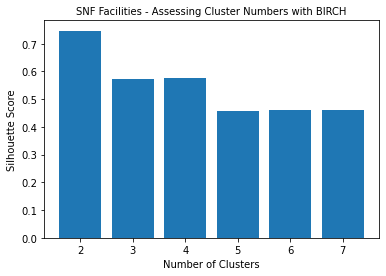

In [12]:
from sklearn.cluster import Birch, MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score

X = snf_cl2
X.index = X.PRVDR_ID
X = X.drop(['PRVDR_ID', 'PRVDR_NAME', 'PRVDR_CITY', 'STATE','SMRY_CTGRY'], axis=1)
X = X.dropna()

birch_silhouette_scores = [] 
for n_cluster in range(2, 8):

    birch_silhouette_scores.append( 
        silhouette_score(X, Birch(n_clusters = n_cluster).fit_predict(X)))       
k = np.arange(2,8)

plt.bar(k, birch_silhouette_scores) 
plt.title('SNF Facilities - Assessing Cluster Numbers with BIRCH', fontsize = 10)
plt.xlabel('Number of Clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [14]:
# apply Birch clustering
from sklearn.cluster import Birch, MiniBatchKMeans
birch1 = Birch(branching_factor=50, n_clusters=2, threshold=1.5)

X['cluster1'] = birch1.fit_predict(X)

# re-fit our model
birch1.fit(X)

# Average silhouette score 
silhouette_score_average1 = silhouette_score(X, birch1.predict(X))

print(silhouette_score_average1)

0.7468227140265337


In [15]:
#To print number of datapoints in each SNF Cluster

snf1 = (X[X['cluster1'] == 0])
snf2 = (X[X['cluster1'] == 1])

print('Size of SNF Clusters:', 'Cluster 1:', len(snf1), ', Cluster 2:', len(snf2))

Size of SNF Clusters: Cluster 1: 13681 , Cluster 2: 906


### Dimension Reduction with PCA

In [16]:
from sklearn.preprocessing import StandardScaler

xp = StandardScaler().fit_transform(X) # normalizing the features
print(xp.shape)
feat_cols = ['feature'+str(i) for i in range(xp.shape[1])]
norm_xp = pd.DataFrame(xp,columns=feat_cols)
norm_xp.tail()

(14587, 31)


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
14582,0.687285,1.057528,1.291507,0.872411,0.972557,0.881959,1.115298,0.162612,0.475464,0.768632,...,0.021435,0.812505,-0.359608,-0.177590,0.428959,0.536558,-0.175848,-0.700831,-0.473409,-0.257339
14583,-0.786508,-0.745291,-0.661492,-0.589556,-0.577666,-0.573661,-0.657905,-2.211235,-2.372674,0.726728,...,-1.904353,0.157072,0.173173,-0.122530,-1.176565,-1.109122,-0.228699,-0.700831,-1.389240,-0.257339
14584,-0.826886,-0.865160,-0.815172,-0.665584,-0.735759,-0.733128,-0.826658,0.223480,0.427995,0.726728,...,-1.320781,0.752920,-0.892389,-2.600217,-0.456847,-1.109122,-0.387253,-0.700831,-1.389240,-0.257339
14585,-0.362540,-0.213076,0.050010,-0.029076,0.051227,0.013415,-0.030336,-0.141727,0.712809,0.475304,...,-0.737208,0.872089,-0.945667,-0.507948,0.318233,-1.109122,-1.021470,-0.700831,-1.389240,-0.257339
14586,-0.524052,-0.611039,-0.583570,-0.489263,-0.531818,-0.528310,-0.604628,-0.202595,0.760278,0.810535,...,-1.087352,0.157072,-0.253052,-0.673127,0.207507,-1.109122,0.035558,-0.700831,-1.389240,-0.257339


In [17]:
from sklearn.decomposition import PCA

for i in range(2,32):
    pca_xp = PCA(n_components=i)
    pcarun_xp = pca_xp.fit_transform(xp)
    fit_xp = pca_xp.fit(xp)
    X["cluster1"].unique()
    norm_xp["cluster1"] = X["cluster1"].values
    var_list = list(pca_xp.explained_variance_ratio_)
    exp_var = sum(var_list)
    if exp_var >= 0.9:
        print('Explained variation per principal component:', var_list)
        print('')
        print('Total variation explained with', i, 'components: ', exp_var)
        break
    i+=1   

Explained variation per principal component: [0.3031100872389138, 0.1336619228628807, 0.10453564216875726, 0.04658561477244499, 0.040423605938316565, 0.03868239073666182, 0.03385595409099469, 0.03110771356345973, 0.02918869827221077, 0.024572709253222105, 0.02416218138635946, 0.019684949996588708, 0.01829511568845565, 0.016183487435464935, 0.01442843197540278, 0.014006581920501438, 0.013467812286173107]

Total variation explained with 17 components:  0.9059528995868087


(14587, 17)
Explained variation for Top 2 principal components: 0.4367720101017945



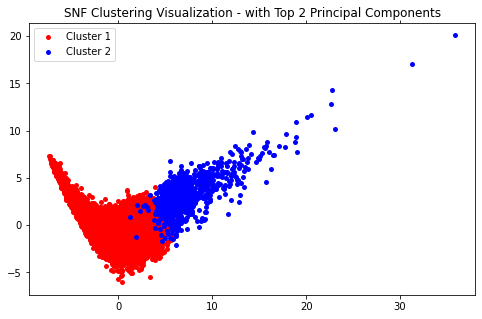

In [18]:
def cluster_visualization(df, columns, labels):
    
    df = df[columns]
    pca = PCA(17)
    pca.fit(df)
    X_PCA = pca.transform(df)
    X_PCA.shape
    print(X_PCA.shape)
    print('Explained variation for Top 2 principal components:', var_list[0] + var_list[1] ) 
    print('')
    
    x, y = X_PCA[:, 0], X_PCA[:, 1] 

    colors = {0: 'red'
              ,1: 'blue'             
             }

    names = {0: 'Cluster 1'
             ,1: 'Cluster 2' 
            }

    df = pd.DataFrame({'x': x, 'y':y, 'label':labels})
    groups = df.groupby('label')

    fig, ax = plt.subplots(figsize=(8, 5)) 

    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
                color=colors[name],label=names[name], mec='none')
        ax.set_aspect('auto')
        ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
        ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')

    ax.legend()
    ax.set_title("SNF Clustering Visualization - with Top 2 Principal Components")
    plt.show()
    
cluster_visualization(norm_xp, columns = norm_xp.columns[:-1], labels = norm_xp["cluster1"])

In [19]:
# Analyze Distribution of Some Variables for Individual Clusters

import plotly.graph_objects as go

f1 = go.Box(y=snf1['TOT_CHRG_AMT'], name='Cluster 1')
f2 = go.Box(y=snf2['TOT_CHRG_AMT'], name='Cluster 2')
f3 = go.Box(y=snf1['BENE_DSTNCT_CNT'], name='Cluster 1')
f4 = go.Box(y=snf2['BENE_DSTNCT_CNT'], name='Cluster 2')
f5 = go.Box(y=snf1['TOT_SRVC_DAYS'], name='Cluster 1')
f6 = go.Box(y=snf2['TOT_SRVC_DAYS'], name='Cluster 2')
f7 = go.Box(y=snf1['BENE_CC_CNCR_PCT'], name='Cluster 1')
f8 = go.Box(y=snf2['BENE_CC_CNCR_PCT'], name='Cluster 2')


fig = subplots.make_subplots(rows=2, cols=2, print_grid=False, subplot_titles=('SNF Medicare Charges','SNF Patient Counts', 'SNF Service Days','Cancer Patients'))
fig.append_trace(f1, 1, 1);
fig.append_trace(f2, 1, 1);
fig.append_trace(f3, 1, 2);
fig.append_trace(f4, 1, 2);
fig.append_trace(f5, 2, 1);
fig.append_trace(f6, 2, 1);
fig.append_trace(f7, 2, 2);
fig.append_trace(f8, 2, 2);


fig['layout'].update(height=800, width=800, showlegend=False);
iplot(fig, filename='simple-subplot');

### Clustering Hospice Facilites by Stay Details, Medicare charges, Distribution of patients by Gender, Ethnicity, Chronic Conditions

In [13]:
hos_cl = pd.read_csv("PACHOS_2020v2.csv", usecols = ['SMRY_CTGRY','PRVDR_ID','PRVDR_NAME','PRVDR_CITY','STATE','BENE_DSTNCT_CNT','TOT_EPSD_STAY_CNT','TOT_SRVC_DAYS','TOT_CHRG_AMT','TOT_ALOWD_AMT','TOT_MDCR_PYMT_AMT','TOT_MDCR_STDZD_PYMT_AMT','BENE_MALE_PCT','BENE_FEML_PCT','BENE_RACE_WHT_PCT','BENE_RACE_BLACK_PCT','BENE_RACE_API_PCT','BENE_RACE_HSPNC_PCT','BENE_RACE_NATIND_PCT','BENE_RACE_OTHR_PCT','BENE_AVG_RISK_SCRE','BENE_PRMRY_DX_CNCR_PCT','BENE_PRMRY_DX_COPD_PCT','BENE_PRMRY_DX_RSPRTRYFAILR_PCT','BENE_PRMRY_DX_DMNT_PCT', 'BENE_PRMRY_DX_STROK_PCT','BENE_PRMRY_DX_CHF_PCT','BENE_PRMRY_DX_HYPRTNSN_PCT','BENE_PRMRY_DX_OTHRCRDVSCLR_PCT','BENE_PRMRY_DX_INFCTN_PCT', 'BENE_PRMRY_DX_ORTHO_PCT','BENE_PRMRY_DX_INJURY_PCT','BENE_PRMRY_DX_MTR_NRL_PCT', 'BENE_PRMRY_DX_DBTS_PCT'])
hos_cl = pd.DataFrame(hos_cl)
hos_cl2=hos_cl[hos_cl['SMRY_CTGRY']== 'PROVIDER']
hos_cl2.head()


,SMRY_CTGRY,PRVDR_ID,PRVDR_NAME,PRVDR_CITY,STATE,BENE_DSTNCT_CNT,TOT_EPSD_STAY_CNT,TOT_SRVC_DAYS,TOT_CHRG_AMT,TOT_ALOWD_AMT,...,BENE_PRMRY_DX_DMNT_PCT,BENE_PRMRY_DX_STROK_PCT,BENE_PRMRY_DX_CHF_PCT,BENE_PRMRY_DX_HYPRTNSN_PCT,BENE_PRMRY_DX_OTHRCRDVSCLR_PCT,BENE_PRMRY_DX_INFCTN_PCT,BENE_PRMRY_DX_ORTHO_PCT,BENE_PRMRY_DX_INJURY_PCT,BENE_PRMRY_DX_MTR_NRL_PCT,BENE_PRMRY_DX_DBTS_PCT
53,PROVIDER,21500,ANCORA HOME HEALTH & HOSPICE,WASILLA,AK,249,552,10590,3751181,2160346,...,0.17,0.06,0.00,0.08,0.04,0.0,0.0,0.0,0.08,0.0
54,PROVIDER,21505,HOSPICE AND HOME CARE OF JUNEAU,JUNEAU,AK,32,70,1310,305559,273294,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0
55,PROVIDER,21506,PROVIDENCE IN HOME SERVICES,ANCHORAGE,AK,320,907,19411,13853041,3917978,...,0.21,0.12,0.10,0.00,0.00,0.0,0.0,0.0,0.03,0.0
56,PROVIDER,21507,FAIRBANKS MEMORIAL HOSPITAL HOSPICE SERVICES,FAIRBANKS,AK,181,475,9953,2569101,1788461,...,0.12,0.17,0.06,0.08,0.00,0.0,0.0,0.0,0.00,0.0
57,PROVIDER,21508,FRONTIER HOME HEALTH AND HOSPICE,ANCHORAGE,AK,177,363,6150,1521074,1270211,...,0.22,0.09,0.00,0.06,0.10,0.0,0.0,0.0,0.00,0.0


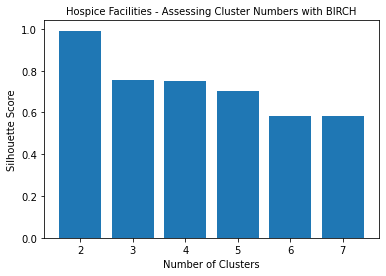

In [20]:
X2 = hos_cl2
X2.index = X2.PRVDR_ID
X2 = X2.drop(['PRVDR_ID', 'PRVDR_NAME', 'PRVDR_CITY', 'STATE','SMRY_CTGRY'], axis=1)
X2 = X2.dropna()

birch_silhouette_scores = [] 

for n_cluster in range(2, 8):
    birch_silhouette_scores.append( 
        silhouette_score(X2, Birch(n_clusters = n_cluster).fit_predict(X2))) 
        
k = np.arange(2,8)

plt.bar(k, birch_silhouette_scores) 
plt.title('Hospice Facilities - Assessing Cluster Numbers with BIRCH', fontsize = 10)
plt.xlabel('Number of Clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [23]:
from sklearn.cluster import Birch, MiniBatchKMeans
birch2 = Birch(branching_factor=50, n_clusters=3, threshold=1.5)

X2['cluster2'] = birch2.fit_predict(X2)

birch2.fit(X2)

silhouette_score_average2 = silhouette_score(X2, birch2.predict(X2))

print(silhouette_score_average2)

0.7560453978939234


In [53]:
#To print number of datapoints in each Hospice Cluster

hos1 = (X2[X2['cluster2'] == 0])
hos2 = (X2[X2['cluster2'] == 1])
hos3 = (X2[X2['cluster2'] == 2])

print('Size of Hospice Clusters:', 'Cluster 1:', len(hos1), ', Cluster 2:', len(hos2), ', Cluster 3:', len(hos3))

Size of Hospice Clusters: Cluster 1: 619 , Cluster 2: 1 , Cluster 3: 4097


### Dimension Reduction with PCA

In [26]:
from sklearn.preprocessing import StandardScaler

xp2 = StandardScaler().fit_transform(X2) 
print(xp2.shape)
feat_cols2 = ['feature'+str(i) for i in range(xp2.shape[1])]
norm_xp2 = pd.DataFrame(xp2,columns=feat_cols2)
norm_xp2.tail()


(4717, 30)


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
4712,-0.361322,-0.341936,-0.332311,-0.255835,-0.308414,-0.308414,-0.297517,0.786570,-0.119348,0.476541,...,-0.769726,0.950088,-0.48107,-0.553552,-0.30547,-0.085058,-0.157702,-0.616635,-0.047154,0.388922
4713,-0.410064,-0.385012,-0.370956,-0.370236,-0.348880,-0.348880,-0.336322,1.415467,-0.595380,1.010435,...,-0.769726,-0.855147,-0.48107,-0.553552,-0.30547,-0.085058,-0.157702,-0.616635,-0.047154,0.388922
4714,-0.400066,-0.377832,-0.369178,-0.373033,-0.347469,-0.347469,-0.333963,0.157674,0.356683,0.590947,...,-0.769726,-0.855147,-0.48107,-0.553552,-0.30547,-0.085058,-0.157702,-0.616635,-0.047154,0.388922
4715,-0.326328,-0.336192,-0.333231,-0.333876,-0.309836,-0.309836,-0.299269,1.336855,-0.535876,0.667217,...,-0.769726,0.533495,-0.48107,-0.553552,-0.30547,-0.085058,-0.157702,-0.616635,-0.047154,0.388922
4716,-0.438809,-0.410498,-0.395343,-0.389778,-0.368699,-0.368699,-0.356217,-2.986807,-3.154048,0.552812,...,-0.769726,-0.855147,-0.48107,-0.553552,-0.30547,-0.085058,-0.157702,-0.616635,-0.047154,0.388922


In [27]:
from sklearn.decomposition import PCA

for i in range(2,30):
    pca_xp2 = PCA(n_components=i)
    pcarun_xp2 = pca_xp2.fit_transform(xp2)
    fit_xp2 = pca_xp2.fit(xp2)
    X2["cluster2"].unique()
    norm_xp2["cluster2"] = X2["cluster2"].values
    var_list2 = list(pca_xp2.explained_variance_ratio_)
    exp_var2 = sum(var_list2)
    if exp_var2 >= 0.9:
        print('Explained variation per principal component:', var_list2)
        print('')
        print('Total variation explained with', i, 'components: ', exp_var2)
        break
    i+=1

Explained variation per principal component: [0.25124314099749295, 0.08756893039008914, 0.06064246868294624, 0.05815043826803321, 0.0436656686802144, 0.042483593004341326, 0.03927391083133027, 0.0379258645175851, 0.0367205835441066, 0.03416107126931103, 0.03294811975851051, 0.0317643236277198, 0.030979568677437924, 0.02797311247872835, 0.025755173207221833, 0.02470312834045979, 0.024043527277919797, 0.022976321515904577]

Total variation explained with 18 components:  0.9129789450693527


Explained variation for Top 2 principal components: 0.33881207138758207


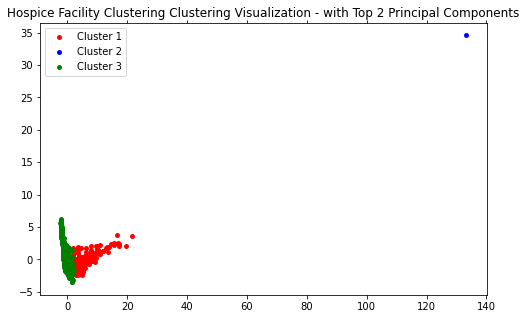

In [67]:
def cluster_visualization(df, columns, labels):
    
    df = df[columns]
    pca = PCA(18)
    pca.fit(df)
    X_PCA = pca.transform(df)
    X_PCA.shape
    print('Explained variation for Top 2 principal components:', var_list2[0] + var_list2[1])    
    
    x, y = X_PCA[:, 0], X_PCA[:, 1] 

    colors = {0: 'red'
              ,1: 'blue'
              ,2: 'green'
             }

    names = {0: 'Cluster 1'
             ,1: 'Cluster 2' 
             ,2: 'Cluster 3' 
            }

    df = pd.DataFrame({'x': x, 'y':y, 'label':labels})
    groups = df.groupby('label')

    fig, ax = plt.subplots(figsize=(8, 5)) 

    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
                color=colors[name],label=names[name], mec='none')
        ax.set_aspect('auto')
        ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
        ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')

    ax.legend()
    ax.set_title("Hospice Facility Clustering Clustering Visualization - with Top 2 Principal Components")
    plt.show()
    
cluster_visualization(norm_xp2, columns = norm_xp2.columns[:-1], labels = norm_xp2["cluster2"])

In [60]:
# Analyze Distribution of Some Variables for Individual Clusters

import plotly.graph_objects as go

f1 = go.Box(y=hos1['TOT_CHRG_AMT'], name='Cluster 1')
f2 = go.Box(y=hos3['TOT_CHRG_AMT'], name='Cluster 3')
f3 = go.Box(y=hos1['BENE_DSTNCT_CNT'], name='Cluster 1')
f4 = go.Box(y=hos3['BENE_DSTNCT_CNT'], name='Cluster 3')
f5 = go.Box(y=hos1['TOT_SRVC_DAYS'], name='Cluster 1')
f6 = go.Box(y=hos3['TOT_SRVC_DAYS'], name='Cluster 3')
f7 = go.Box(y=hos1['BENE_PRMRY_DX_CNCR_PCT'], name='Cluster 1')
f8 = go.Box(y=hos3['BENE_PRMRY_DX_CNCR_PCT'], name='Cluster 3')


fig = subplots.make_subplots(rows=2, cols=2, print_grid=False, subplot_titles=('HOS Medicare Charges','HOS Patient Counts', 'HOS Service Days','Cancer Patients'))
fig.append_trace(f1, 1, 1);
fig.append_trace(f2, 1, 1);
fig.append_trace(f3, 1, 2);
fig.append_trace(f4, 1, 2);
fig.append_trace(f5, 2, 1);
fig.append_trace(f6, 2, 1);
fig.append_trace(f7, 2, 2);
fig.append_trace(f8, 2, 2);


fig['layout'].update(height=800, width=800, showlegend=False);
iplot(fig, filename='simple-subplot');

### Clustering Home Health Facilites by Stay Details, Medicare charges, Distribution of patients by Gender, Ethnicity, Chronic Conditions

In [32]:
hh_cl = pd.read_csv("PACHH_2020V2.csv", usecols = ['SMRY_CTGRY','PRVDR_ID','PRVDR_NAME','PRVDR_CITY','STATE','BENE_DSTNCT_CNT','TOT_EPSD_STAY_CNT','TOT_SRVC_DAYS','TOT_CHRG_AMT','TOT_ALOWD_AMT','TOT_MDCR_PYMT_AMT','TOT_MDCR_STDZD_PYMT_AMT','BENE_MALE_PCT','BENE_FEML_PCT','BENE_RACE_WHT_PCT','BENE_RACE_BLACK_PCT','BENE_RACE_API_PCT','BENE_RACE_HSPNC_PCT','BENE_RACE_NATIND_PCT','BENE_RACE_OTHR_PCT','BENE_AVG_RISK_SCRE','BENE_CC_AF_PCT','BENE_CC_ALZHMR_PCT','BENE_CC_ASTHMA_PCT','BENE_CC_CNCR_PCT','BENE_CC_CHF_PCT','BENE_CC_CKD_PCT','BENE_CC_COPD_PCT','BENE_CC_DPRSSN_PCT','BENE_CC_DBTS_PCT','BENE_CC_IHD_PCT','BENE_CC_OPO_PCT','BENE_CC_RAOA_PCT','BENE_CC_SZ_PCT','BENE_CC_STROK_PCT'])
hh_cl = pd.DataFrame(hh_cl)
hh_cl2=hh_cl[hh_cl['SMRY_CTGRY']== 'PROVIDER']
hh_cl2.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.



,SMRY_CTGRY,PRVDR_ID,PRVDR_NAME,PRVDR_CITY,STATE,BENE_DSTNCT_CNT,TOT_EPSD_STAY_CNT,TOT_SRVC_DAYS,TOT_CHRG_AMT,TOT_ALOWD_AMT,...,BENE_CC_CHF_PCT,BENE_CC_CKD_PCT,BENE_CC_COPD_PCT,BENE_CC_DPRSSN_PCT,BENE_CC_DBTS_PCT,BENE_CC_IHD_PCT,BENE_CC_OPO_PCT,BENE_CC_RAOA_PCT,BENE_CC_SZ_PCT,BENE_CC_STROK_PCT
53,PROVIDER,27001,PROVIDENCE IN HOME SERVICES,ANCHORAGE,AK,427,1027,26281,3299904,2218370,...,0.40,0.60,0.25,0.38,0.44,0.44,0.21,0.63,0.04,0.11
54,PROVIDER,27002,HOSPICE & HOME CARE OF JUNEAU,JUNEAU,AK,141,371,9664,812345,756322,...,0.31,0.51,0.28,0.34,0.34,0.34,0.17,0.39,0.00,0.13
55,PROVIDER,27006,FAIRBANKS MEMORIAL HOSPITAL HHA,FAIRBANKS,AK,144,360,9452,542215,674040,...,0.36,0.47,0.25,0.28,0.34,0.42,0.13,0.42,0.00,0.18
56,PROVIDER,27008,ANCORA HOME HEALTH & HOSPICE,WASILLA,AK,569,1611,42029,5818729,3705798,...,0.40,0.64,0.34,0.44,0.44,0.49,0.18,0.63,0.03,0.16
57,PROVIDER,27009,PETERSBURG MEDICAL CENTER HOME,PETERSBURG,AK,40,177,5071,525420,442058,...,0.52,0.40,0.30,0.42,0.35,0.30,0.00,0.55,0.00,0.00


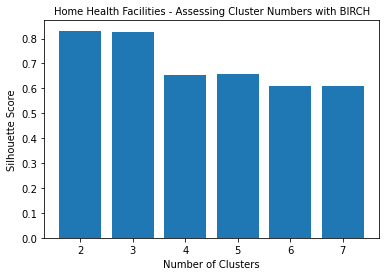

In [33]:
from sklearn.cluster import Birch, MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score


X3 = hh_cl2
X3.index = X3.PRVDR_ID
X3 = X3.drop(['PRVDR_ID', 'PRVDR_NAME', 'PRVDR_CITY', 'STATE','SMRY_CTGRY'], axis=1)
X3 = X3.dropna()


birch_silhouette_scores = [] 

for n_cluster in range(2, 8):

    birch_silhouette_scores.append( 
        silhouette_score(X3, Birch(n_clusters = n_cluster).fit_predict(X3))) 
        
k = np.arange(2,8)

plt.bar(k, birch_silhouette_scores) 
plt.title('Home Health Facilities - Assessing Cluster Numbers with BIRCH', fontsize = 10)
plt.xlabel('Number of Clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [34]:
from sklearn.cluster import Birch, MiniBatchKMeans
birch3 = Birch(branching_factor=50, n_clusters=2, threshold=1.5)

X3['cluster3'] = birch3.fit_predict(X3)

birch3.fit(X3)

silhouette_score_average3 = silhouette_score(X3, birch3.predict(X3))

print(silhouette_score_average3)

0.8312757494764147


In [35]:
#To print number of datapoints in each Home Health Cluster

hh1 = (X3[X3['cluster3'] == 0])
hh2 = (X3[X3['cluster3'] == 1])

print('Size of Home Health Clusters:', 'Cluster 1:', len(hh1), ', Cluster 2:', len(hh2))

Size of Home Health Clusters: Cluster 1: 426 , Cluster 2: 8165


In [36]:
from sklearn.preprocessing import StandardScaler

xp3 = StandardScaler().fit_transform(X3) # normalizing the features
print(xp3.shape)
feat_cols3 = ['feature'+str(i) for i in range(xp3.shape[1])]
norm_xp3= pd.DataFrame(xp3,columns=feat_cols3)
norm_xp3.tail()


(8591, 31)


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
8586,-0.288452,-0.305198,-0.309266,-0.326625,-0.287517,-0.287517,-0.305521,0.559104,0.159608,0.731536,...,-0.027190,0.863491,0.026074,-0.334349,0.426185,-0.368524,-1.201270,-0.477764,0.509589,0.228416
8587,-0.438394,-0.476084,-0.481729,-0.344885,-0.429441,-0.429441,-0.451256,0.342125,0.364027,1.107910,...,-1.611483,-0.509671,-0.346750,-0.966503,-1.432258,-1.260157,0.041297,-0.477764,-1.163215,0.228416
8588,-0.100645,0.018288,0.037295,-0.126069,-0.003431,-0.003431,-0.009692,0.414451,0.261818,0.919723,...,-0.534164,0.574405,0.461036,-0.391817,-0.643827,-0.170383,-0.769073,0.470182,0.053370,0.228416
8589,-0.518666,-0.586435,-0.597412,-0.493733,-0.546803,-0.546803,-0.572206,-2.550928,-2.702262,0.919723,...,-3.576006,-1.955104,-2.459421,-2.690558,-2.952802,-1.260157,-0.012728,-0.477764,-1.163215,0.228416
8590,-0.512608,-0.573824,-0.583571,-0.492346,-0.543642,-0.543642,-0.569138,-2.550928,-2.702262,0.794265,...,0.289669,-1.955104,-2.459421,-2.690558,-2.952802,-1.260157,-0.661024,-0.477764,-1.163215,0.228416


In [37]:
from sklearn.decomposition import PCA

for i in range(2,32):
    pca_xp3 = PCA(n_components=i)
    pcarun_xp3 = pca_xp3.fit_transform(xp3)
    fit_xp3 = pca_xp3.fit(xp3)
    X3["cluster3"].unique()
    norm_xp3["cluster3"] = X3["cluster3"].values
    var_list3 = list(pca_xp3.explained_variance_ratio_)
    exp_var3 = sum(var_list3)
    if exp_var3 >= 0.9:
        print('Explained variation per principal component:', var_list3)
        print('')
        print('Total variation explained with', i, 'components: ', exp_var3)
        break
    i+=1



Explained variation per principal component: [0.27594245735449235, 0.16227725773576793, 0.09245575579697113, 0.055704520476743, 0.044494539368375344, 0.042870434095211796, 0.03776856169048813, 0.03312674460441583, 0.02894721139713448, 0.02738491623535095, 0.024670988819027056, 0.02053139545043058, 0.018269312493108758, 0.016541996117308225, 0.014539701863562638, 0.013597671307884002]

Total variation explained with 16 components:  0.9091234648062724


Explained variation for Top 2 principal components: 0.43821971509026025


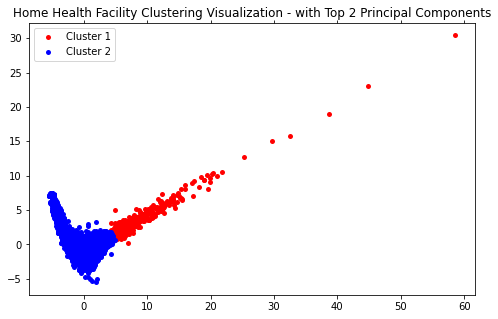

In [68]:
def cluster_visualization(df, columns, labels):
    
    df = df[columns]
    pca = PCA(16)
    pca.fit(df)
    X_PCA = pca.transform(df)
    X_PCA.shape
    print('Explained variation for Top 2 principal components:', var_list3[0] + var_list3[1])    
    
    x, y = X_PCA[:, 0], X_PCA[:, 1] 

    colors = {0: 'red'
              ,1: 'blue'
             }

    names = {0: 'Cluster 1'
             ,1: 'Cluster 2' 
            }

    df = pd.DataFrame({'x': x, 'y':y, 'label':labels})
    groups = df.groupby('label')

    fig, ax = plt.subplots(figsize=(8, 5)) 

    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
                color=colors[name],label=names[name], mec='none')
        ax.set_aspect('auto')
        ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
        ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')

    ax.legend()
    ax.set_title("Home Health Facility Clustering Visualization - with Top 2 Principal Components")
    plt.show()
    
cluster_visualization(norm_xp3, columns = norm_xp3.columns[:-1], labels = norm_xp3["cluster3"])

In [39]:
# Analyze Distribution of Some Variables for Individual Clusters

import plotly.graph_objects as go

f1 = go.Box(y=hh1['TOT_CHRG_AMT'], name='Cluster 1')
f2 = go.Box(y=hh2['TOT_CHRG_AMT'], name='Cluster 2')
f3 = go.Box(y=hh1['BENE_DSTNCT_CNT'], name='Cluster 1')
f4 = go.Box(y=hh2['BENE_DSTNCT_CNT'], name='Cluster 2')
f5 = go.Box(y=hh1['TOT_SRVC_DAYS'], name='Cluster 1')
f6 = go.Box(y=hh2['TOT_SRVC_DAYS'], name='Cluster 2')
f7 = go.Box(y=hh1['BENE_CC_CNCR_PCT'], name='Cluster 1')
f8 = go.Box(y=hh2['BENE_CC_CNCR_PCT'], name='Cluster 2')


fig = subplots.make_subplots(rows=2, cols=2, print_grid=False, subplot_titles=('Home Health Medicare Charges','Home Health Patient Counts', 'Home Health Service Days','Cancer Patients'))
fig.append_trace(f1, 1, 1);
fig.append_trace(f2, 1, 1);
fig.append_trace(f3, 1, 2);
fig.append_trace(f4, 1, 2);
fig.append_trace(f5, 2, 1);
fig.append_trace(f6, 2, 1);
fig.append_trace(f7, 2, 2);
fig.append_trace(f8, 2, 2);


fig['layout'].update(height=800, width=800, showlegend=False);
iplot(fig, filename='simple-subplot');

### Clustering Inpatient Rehab Facilites by Stay Details, Medicare charges, Distribution of patients by Gender, Ethnicity, Chronic Conditions

In [40]:
irf_cl = pd.read_csv("PACIRF_2020V2.csv", usecols = ['SMRY_CTGRY','PRVDR_ID','PRVDR_NAME','PRVDR_CITY','STATE','BENE_DSTNCT_CNT','TOT_EPSD_STAY_CNT','TOT_SRVC_DAYS','TOT_CHRG_AMT','TOT_ALOWD_AMT','TOT_MDCR_PYMT_AMT','TOT_MDCR_STDZD_PYMT_AMT','BENE_MALE_PCT','BENE_FEML_PCT','BENE_RACE_WHT_PCT','BENE_RACE_BLACK_PCT','BENE_RACE_API_PCT','BENE_RACE_HSPNC_PCT','BENE_RACE_NATIND_PCT','BENE_RACE_OTHR_PCT','BENE_AVG_RISK_SCRE','BENE_CC_AF_PCT','BENE_CC_ALZHMR_PCT','BENE_CC_ASTHMA_PCT','BENE_CC_CNCR_PCT','BENE_CC_CHF_PCT','BENE_CC_CKD_PCT','BENE_CC_COPD_PCT','BENE_CC_DPRSSN_PCT','BENE_CC_DBTS_PCT','BENE_CC_IHD_PCT','BENE_CC_OPO_PCT','BENE_CC_RAOA_PCT','BENE_CC_SZ_PCT','BENE_CC_STROK_PCT'])
irf_cl = pd.DataFrame(irf_cl)
irf_cl2=irf_cl[irf_cl['SMRY_CTGRY']== 'PROVIDER']
irf_cl2.head()

,SMRY_CTGRY,PRVDR_ID,PRVDR_NAME,PRVDR_CITY,STATE,BENE_DSTNCT_CNT,TOT_EPSD_STAY_CNT,TOT_SRVC_DAYS,TOT_CHRG_AMT,TOT_ALOWD_AMT,...,BENE_CC_CHF_PCT,BENE_CC_CKD_PCT,BENE_CC_COPD_PCT,BENE_CC_DPRSSN_PCT,BENE_CC_DBTS_PCT,BENE_CC_IHD_PCT,BENE_CC_OPO_PCT,BENE_CC_RAOA_PCT,BENE_CC_SZ_PCT,BENE_CC_STROK_PCT
53,PROVIDER,20001,PROVIDENCE ALASKA MEDICAL CENTER,ANCHORAGE,AK,40,40,666,5007784,1278230,...,0.42,0.70,0.00,0.40,0.52,0.52,0.00,0.50,0.00,0.65
54,PROVIDER,20017,ALASKA REGIONAL HOSPITAL,ANCHORAGE,AK,98,100,1425,11111476,3609570,...,0.33,0.57,0.38,0.35,0.48,0.52,0.17,0.63,0.00,0.43
55,PROVIDER,10011,ST VINCENT'S EAST,BIRMINGHAM,AL,66,69,885,3705851,1268452,...,0.51,0.74,0.39,0.51,0.48,0.72,0.00,0.66,0.00,0.45
56,PROVIDER,10029,EAST ALABAMA MEDICAL CENTER,OPELIKA,AL,157,168,2239,5437675,3661444,...,0.54,0.88,0.38,0.44,0.52,0.61,0.15,0.67,0.09,0.36
57,PROVIDER,10033,UNIVERSITY OF ALABAMA HOSPITAL,BIRMINGHAM,AL,201,219,3173,16405267,5743019,...,0.40,0.68,0.27,0.53,0.50,0.62,0.12,0.68,0.00,0.37


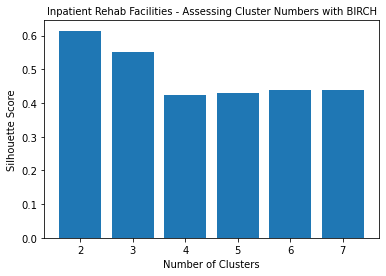

In [41]:
from sklearn.cluster import Birch, MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score


X4 = irf_cl2
X4.index = X4.PRVDR_ID
X4 = X4.drop(['PRVDR_ID', 'PRVDR_NAME', 'PRVDR_CITY', 'STATE', 'SMRY_CTGRY'], axis=1)
X4 = X4.dropna()


birch_silhouette_scores = [] 

for n_cluster in range(2, 8):

    birch_silhouette_scores.append( 
        silhouette_score(X4, Birch(n_clusters = n_cluster).fit_predict(X4))) 
        
k = np.arange(2,8)

plt.bar(k, birch_silhouette_scores) 
plt.title('Inpatient Rehab Facilities - Assessing Cluster Numbers with BIRCH', fontsize = 10)
plt.xlabel('Number of Clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [42]:
from sklearn.cluster import Birch, MiniBatchKMeans
birch4 = Birch(branching_factor=50, n_clusters=2, threshold=1.5)

X4['cluster4'] = birch4.fit_predict(X4)

birch4.fit(X4)

silhouette_score_average4 = silhouette_score(X4, birch4.predict(X4))

print(silhouette_score_average4)

0.6145210346110966


In [43]:
#To print number of datapoints in each IRF Cluster

irf1 = (X4[X4['cluster4'] == 0])
irf2 = (X4[X4['cluster4'] == 1])

print('Size of IRF Clusters:', 'Cluster 1:', len(irf1), ', Cluster 2:', len(irf2))

Size of IRF Clusters: Cluster 1: 191 , Cluster 2: 907


In [44]:
from sklearn.preprocessing import StandardScaler

xp4 = StandardScaler().fit_transform(X4) 
print(xp4.shape)
feat_cols4 = ['feature'+str(i) for i in range(xp4.shape[1])]
norm_xp4= pd.DataFrame(xp4,columns=feat_cols4)
norm_xp4.tail()

(1098, 31)


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
1093,1.346517,1.460562,1.195376,0.187571,0.743497,0.723405,1.179851,-0.899478,0.974024,1.018485,...,0.020834,1.513271,0.878278,0.200324,0.948980,0.642139,1.835065,0.476162,-0.838130,0.458895
1094,2.201908,2.240807,2.219519,0.808129,1.990271,1.973554,2.404316,-0.899478,0.974024,0.863158,...,1.679768,0.894568,0.415982,0.711849,0.775316,0.390688,1.835065,0.476162,-0.577382,-2.179149
1095,3.188368,3.238795,2.939962,1.290975,2.610396,2.608319,3.169396,-0.270416,0.359169,0.914934,...,0.370083,0.894568,0.600901,0.609544,0.775316,0.139237,0.625485,0.692653,-0.925045,-2.179149
1096,-0.257342,-0.281381,-0.394680,-0.451541,-0.324870,-0.324512,-0.284074,0.107021,-0.009744,0.500731,...,-1.376163,-0.254452,-0.601069,-1.641165,-1.221811,-0.112214,-0.324900,-0.606293,-0.838130,0.458895
1097,0.580803,0.556324,0.770242,-0.102319,0.648755,0.651770,0.705847,-0.396229,0.482140,0.707832,...,-1.376163,0.099092,-0.323691,-1.231946,-0.787653,0.390688,-0.411298,-0.606293,-1.185793,0.458895


In [45]:
from sklearn.decomposition import PCA

for i in range(2,32):
    pca_xp4 = PCA(n_components=i)
    pcarun_xp4 = pca_xp4.fit_transform(xp4)
    fit_xp4 = pca_xp4.fit(xp4)
    X4["cluster4"].unique()
    norm_xp4["cluster4"] = X4["cluster4"].values
    var_list4 = list(pca_xp4.explained_variance_ratio_)
    exp_var4 = sum(var_list4)
    if exp_var4 >= 0.9:
        print('Explained variation per principal component:', var_list4)
        print('')
        print('Total variation explained with', i, 'components: ', exp_var4)
        break
    i+=1


Explained variation per principal component: [0.28400088026949744, 0.1471700561459162, 0.09874158025373049, 0.06281280487507086, 0.04680010924777562, 0.035824629849482405, 0.03456118459381504, 0.0319552040763962, 0.031405124173223914, 0.023696524608358437, 0.022771702265656585, 0.01988243631641262, 0.01805318011215445, 0.016319182740451247, 0.0159372169244966, 0.014939808053044089]

Total variation explained with 16 components:  0.9048716245054823


Explained variation for Top 2 principal components: 0.4311709364154136


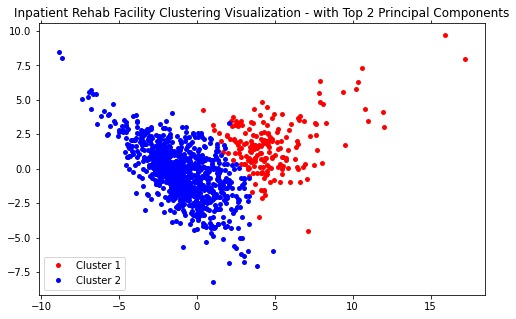

In [66]:
def cluster_visualization(df, columns, labels):
    
    df = df[columns]
    pca = PCA(16)
    pca.fit(df)
    X_PCA = pca.transform(df)
    X_PCA.shape
    print('Explained variation for Top 2 principal components:', var_list4[0] + var_list4[1])    
    
    x, y = X_PCA[:, 0], X_PCA[:, 1] 

    colors = {0: 'red'
              ,1: 'blue'
             }

    names = {0: 'Cluster 1'
             ,1: 'Cluster 2' 
            }

    df = pd.DataFrame({'x': x, 'y':y, 'label':labels})
    groups = df.groupby('label')

    fig, ax = plt.subplots(figsize=(8, 5)) 

    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
                color=colors[name],label=names[name], mec='none')
        ax.set_aspect('auto')
        ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
        ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')

    ax.legend()
    ax.set_title("Inpatient Rehab Facility Clustering Visualization - with Top 2 Principal Components")
    plt.show()
    
cluster_visualization(norm_xp4, columns = norm_xp4.columns[:-1], labels = norm_xp4["cluster4"])

In [47]:
# Analyze Distribution of Some Variables for Individual Clusters

import plotly.graph_objects as go

f1 = go.Box(y=irf1['TOT_CHRG_AMT'], name='Cluster 1')
f2 = go.Box(y=irf2['TOT_CHRG_AMT'], name='Cluster 2')
f3 = go.Box(y=irf1['BENE_DSTNCT_CNT'], name='Cluster 1')
f4 = go.Box(y=irf2['BENE_DSTNCT_CNT'], name='Cluster 2')
f5 = go.Box(y=irf1['TOT_SRVC_DAYS'], name='Cluster 1')
f6 = go.Box(y=irf2['TOT_SRVC_DAYS'], name='Cluster 2')
f7 = go.Box(y=irf1['BENE_CC_CNCR_PCT'], name='Cluster 1')
f8 = go.Box(y=irf2['BENE_CC_CNCR_PCT'], name='Cluster 2')


fig = subplots.make_subplots(rows=2, cols=2, print_grid=False, subplot_titles=('IRF Medicare Charges','IRF Patient Counts', 'IRF Service Days','Cancer Patients'))
fig.append_trace(f1, 1, 1);
fig.append_trace(f2, 1, 1);
fig.append_trace(f3, 1, 2);
fig.append_trace(f4, 1, 2);
fig.append_trace(f5, 2, 1);
fig.append_trace(f6, 2, 1);
fig.append_trace(f7, 2, 2);
fig.append_trace(f8, 2, 2);


fig['layout'].update(height=800, width=800, showlegend=False);
iplot(fig, filename='simple-subplot');

### Clustering Longterm Care Facilites by Stay Details, Medicare charges, Distribution of patients by Gender, Ethnicity, Chronic Conditions

In [49]:
ltc_cl = pd.read_csv("PACLTC_2020V2.csv", usecols = ['SMRY_CTGRY','PRVDR_ID','PRVDR_NAME','PRVDR_CITY','STATE','BENE_DSTNCT_CNT','TOT_EPSD_STAY_CNT','TOT_SRVC_DAYS','TOT_CHRG_AMT','TOT_ALOWD_AMT','TOT_MDCR_PYMT_AMT','TOT_MDCR_STDZD_PYMT_AMT','BENE_MALE_PCT','BENE_FEML_PCT','BENE_RACE_WHT_PCT','BENE_RACE_BLACK_PCT','BENE_RACE_API_PCT','BENE_RACE_HSPNC_PCT','BENE_RACE_NATIND_PCT','BENE_RACE_OTHR_PCT','BENE_AVG_RISK_SCRE','BENE_CC_AF_PCT','BENE_CC_ALZHMR_PCT','BENE_CC_ASTHMA_PCT','BENE_CC_CNCR_PCT','BENE_CC_CHF_PCT','BENE_CC_CKD_PCT','BENE_CC_COPD_PCT','BENE_CC_DPRSSN_PCT','BENE_CC_DBTS_PCT','BENE_CC_IHD_PCT','BENE_CC_OPO_PCT','BENE_CC_RAOA_PCT','BENE_CC_SZ_PCT','BENE_CC_STROK_PCT'])
ltc_cl = pd.DataFrame(ltc_cl)
ltc_cl2= ltc_cl[ltc_cl['SMRY_CTGRY']== 'PROVIDER']
ltc_cl2.head()

,SMRY_CTGRY,PRVDR_ID,PRVDR_NAME,PRVDR_CITY,STATE,BENE_DSTNCT_CNT,TOT_EPSD_STAY_CNT,TOT_SRVC_DAYS,TOT_CHRG_AMT,TOT_ALOWD_AMT,...,BENE_CC_CHF_PCT,BENE_CC_CKD_PCT,BENE_CC_COPD_PCT,BENE_CC_DPRSSN_PCT,BENE_CC_DBTS_PCT,BENE_CC_IHD_PCT,BENE_CC_OPO_PCT,BENE_CC_RAOA_PCT,BENE_CC_SZ_PCT,BENE_CC_STROK_PCT
46,PROVIDER,22001,ST ELIAS SPECIALTY HOSPITAL,ANCHORAGE,AK,91,96,4896,27069125,8941912,...,0.52,0.88,0.45,0.56,0.58,0.60,0.00,0.52,0.00,0.17
47,PROVIDER,12006,INFIRMARY LTAC HOSPITAL,MOBILE,AL,142,146,3584,12530069,5488005,...,0.61,0.88,0.42,0.50,0.70,0.88,0.09,0.54,0.09,0.21
48,PROVIDER,12007,"NOLAND HOSPITAL MONTGOMERY II, LLC",MONTGOMERY,AL,92,96,2484,9743752,4022735,...,0.88,0.88,0.48,0.45,0.69,0.69,0.13,0.55,0.00,0.29
49,PROVIDER,12008,SELECT SPECIALTY HOSPITAL - BIRMINGHAM,BIRMINGHAM,AL,154,157,4546,41612575,7526436,...,0.70,0.88,0.57,0.53,0.63,0.67,0.07,0.58,0.11,0.31
50,PROVIDER,12009,"NOLAND HOSPITAL BIRMINGHAM II, LLC",BIRMINGHAM,AL,165,171,4034,13730113,6142023,...,0.60,0.88,0.49,0.66,0.62,0.69,0.09,0.53,0.10,0.23


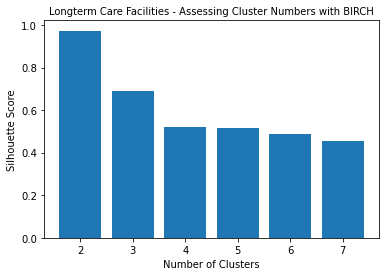

In [50]:
from sklearn.cluster import Birch, MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score


X5 = ltc_cl2
X5.index = X5.PRVDR_ID
X5 = X5.drop(['PRVDR_ID', 'PRVDR_NAME', 'PRVDR_CITY', 'STATE', 'SMRY_CTGRY'], axis=1)
X5 = X5.dropna()


birch_silhouette_scores = [] 

for n_cluster in range(2, 8):

    birch_silhouette_scores.append( 
        silhouette_score(X5, Birch(n_clusters = n_cluster).fit_predict(X5))) 
        
k = np.arange(2,8)

plt.bar(k, birch_silhouette_scores) 
plt.title('Longterm Care Facilities - Assessing Cluster Numbers with BIRCH', fontsize = 10)
plt.xlabel('Number of Clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [51]:
from sklearn.cluster import Birch, MiniBatchKMeans
birch5 = Birch(branching_factor=50, n_clusters=3, threshold=1.5)

X5['cluster5'] = birch5.fit_predict(X5)

birch5.fit(X5)

silhouette_score_average5 = silhouette_score(X5, birch5.predict(X5))

print(silhouette_score_average5)

0.6914894008287482


In [54]:
#To print number of datapoints in each IRF Cluster

ltc1 = (X5[X5['cluster5'] == 0])
ltc2 = (X5[X5['cluster5'] == 1])
ltc3 = (X5[X5['cluster5'] == 2])

print('Size of LTC Clusters:', 'Cluster 1:', len(ltc1), ', Cluster 2:', len(ltc2),', Cluster 3:', len(ltc3))

Size of LTC Clusters: Cluster 1: 325 , Cluster 2: 1 , Cluster 3: 26


In [55]:
from sklearn.preprocessing import StandardScaler

xp5 = StandardScaler().fit_transform(X5) # normalizing the features
print(xp5.shape)
feat_cols5 = ['feature'+str(i) for i in range(xp5.shape[1])]
norm_xp5= pd.DataFrame(xp5,columns=feat_cols5)
norm_xp5.tail()

(352, 31)


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
347,-0.362900,-0.327780,-0.383970,-0.210477,-0.211699,-0.196968,-0.300487,-0.118913,0.414027,0.989511,...,0.214566,-0.484966,-0.205001,-0.418112,-0.101168,-0.346308,-0.651262,-1.152417,-0.617542,-0.286797
348,0.152310,0.059563,0.240281,0.042746,0.168373,0.152007,0.424960,-0.118913,0.414027,1.187808,...,0.214566,1.065164,0.424042,0.007866,1.173051,-0.689207,-0.206128,0.624156,-0.157976,-0.286797
349,0.202575,0.124120,0.145100,0.076518,0.102570,0.121116,0.306452,-0.018294,0.301315,1.534827,...,0.214566,1.065164,0.334179,0.078862,1.173051,-0.346308,1.040249,0.387280,-0.502651,-0.286797
350,-1.273941,-1.092533,-1.307927,-0.465069,-1.251399,-1.257831,-1.407065,-5.250473,-4.996187,1.633975,...,-6.438485,-3.520637,-5.147479,-4.606894,-4.728594,-1.717904,-4.924553,-1.152417,-2.800483,-0.286797
351,-0.991204,-0.864100,-1.112921,-0.417692,-1.115165,-1.115931,-1.211848,0.484800,-0.262249,1.187808,...,0.214566,0.935986,0.244316,0.078862,1.173051,-1.717904,-0.028074,-1.152417,-2.800483,-0.286797


In [56]:
from sklearn.decomposition import PCA

for i in range(2,32):
    pca_xp5 = PCA(n_components=i)
    pcarun_xp5 = pca_xp5.fit_transform(xp5)
    fit_xp5 = pca_xp5.fit(xp5)
    X5["cluster5"].unique()
    norm_xp5["cluster5"] = X5["cluster5"].values
    var_list5 = list(pca_xp5.explained_variance_ratio_)
    exp_var5 = sum(var_list5)
    if exp_var5 >= 0.9:
        print('Explained variation per principal component:', var_list5)
        print('')
        print('Total variation explained with', i, 'components: ', exp_var5)
        break
    i+=1

Explained variation per principal component: [0.3051719270083939, 0.1567418447236877, 0.0853575955640597, 0.04875042649807613, 0.04575870044634274, 0.0378816262195884, 0.03461395905377395, 0.03206708070560402, 0.029206791840555656, 0.02585412650840606, 0.024007752454781168, 0.022460548048515664, 0.019687526551303534, 0.01835360204629753, 0.015535512859107422]

Total variation explained with 15 components:  0.9014490205284936


Explained variation for Top 2 principal components: 0.4619137717320816


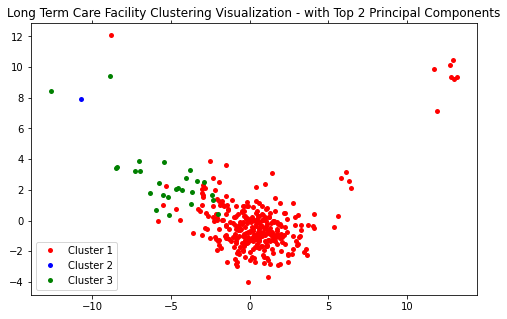

In [69]:
def cluster_visualization(df, columns, labels):
    
    df = df[columns]
    pca = PCA(15)
    pca.fit(df)
    X_PCA = pca.transform(df)
    X_PCA.shape
    print('Explained variation for Top 2 principal components:', var_list5[0] + var_list5[1])    
    
    x, y = X_PCA[:, 0], X_PCA[:, 1] 

    colors = {0: 'red'
              ,1: 'blue'
              ,2: 'green'
             }

    names = {0: 'Cluster 1'
             ,1: 'Cluster 2' 
             ,2: 'Cluster 3'
            }

    df = pd.DataFrame({'x': x, 'y':y, 'label':labels})
    groups = df.groupby('label')

    fig, ax = plt.subplots(figsize=(8, 5)) 

    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
                color=colors[name],label=names[name], mec='none')
        ax.set_aspect('auto')
        ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
        ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')

    ax.legend()
    ax.set_title("Long Term Care Facility Clustering Visualization - with Top 2 Principal Components")
    plt.show()
    
cluster_visualization(norm_xp5, columns = norm_xp5.columns[:-1], labels = norm_xp5["cluster5"])

In [59]:
# Analyze Distribution of Some Variables for Individual Clusters

import plotly.graph_objects as go

f1 = go.Box(y=ltc1['TOT_CHRG_AMT'], name='Cluster 1')
f2 = go.Box(y=ltc3['TOT_CHRG_AMT'], name='Cluster 3')
f3 = go.Box(y=ltc1['BENE_DSTNCT_CNT'], name='Cluster 1')
f4 = go.Box(y=ltc3['BENE_DSTNCT_CNT'], name='Cluster 3')
f5 = go.Box(y=ltc1['TOT_SRVC_DAYS'], name='Cluster 1')
f6 = go.Box(y=ltc3['TOT_SRVC_DAYS'], name='Cluster 3')
f7 = go.Box(y=ltc1['BENE_CC_CNCR_PCT'], name='Cluster 1')
f8 = go.Box(y=ltc3['BENE_CC_CNCR_PCT'], name='Cluster 3')


fig = subplots.make_subplots(rows=2, cols=2, print_grid=False, subplot_titles=('LTC Medicare Charges','LTC Patient Counts', 'LTC Service Days','Cancer Patients'))
fig.append_trace(f1, 1, 1);
fig.append_trace(f2, 1, 1);
fig.append_trace(f3, 1, 2);
fig.append_trace(f4, 1, 2);
fig.append_trace(f5, 2, 1);
fig.append_trace(f6, 2, 1);
fig.append_trace(f7, 2, 2);
fig.append_trace(f8, 2, 2);


fig['layout'].update(height=800, width=800, showlegend=False);
iplot(fig, filename='simple-subplot');